<a href="https://colab.research.google.com/github/ibrahimelawady/data-portfolio/blob/main/project_05_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Import libraries & Load dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/drive/MyDrive/DATA_SCIENCE_PROJECTS/Sales_Data.csv"
df = pd.read_csv(file_path)

df.head()


,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


##Quick overview of the dataset

In [5]:
print(df.shape)
df.info()
df.describe()


(12, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     int64
 1   facecream     12 non-null     int64
 2   facewash      12 non-null     int64
 3   toothpaste    12 non-null     int64
 4   bathingsoap   12 non-null     int64
 5   shampoo       12 non-null     int64
 6   moisturizer   12 non-null     int64
 7   total_units   12 non-null     int64
 8   total_profit  12 non-null     int64
dtypes: int64(9)
memory usage: 996.0 bytes


,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000
mean,6.500000,2873.333333,1542.916667,5825.833333,9500.833333,2117.500000,1542.916667,26027.50000,260275.000000
std,3.605551,584.595172,316.733745,1242.032486,2348.095779,617.724931,316.733745,7014.36594,70143.659404
min,1.000000,1990.000000,1120.000000,4550.000000,6100.000000,1200.000000,1120.000000,18330.00000,183300.000000
25%,3.750000,2460.000000,1305.000000,4862.500000,8015.000000,1795.000000,1305.000000,21065.00000,210650.000000
50%,6.500000,2830.000000,1527.500000,5530.000000,9090.000000,1995.000000,1527.500000,22935.00000,229350.000000
75%,9.250000,3435.000000,1765.000000,6400.000000,10045.000000,2325.000000,1765.000000,29667.50000,296675.000000
max,12.000000,3700.000000,2100.000000,8300.000000,14400.000000,3550.000000,2100.000000,41280.00000,412800.000000


In [6]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Info about columns
print("\nDataset info:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Dataset shape: (12, 9)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     int64
 1   facecream     12 non-null     int64
 2   facewash      12 non-null     int64
 3   toothpaste    12 non-null     int64
 4   bathingsoap   12 non-null     int64
 5   shampoo       12 non-null     int64
 6   moisturizer   12 non-null     int64
 7   total_units   12 non-null     int64
 8   total_profit  12 non-null     int64
dtypes: int64(9)
memory usage: 996.0 bytes
None

Summary statistics:
       month_number    facecream     facewash   toothpaste   bathingsoap  \
count     12.000000    12.000000    12.000000    12.000000     12.000000   
mean       6.500000  2873.333333  1542.916667  5825.833333   9500.833333   
std        3.605551   584.595172   316.733745  1242.032486   2348.095779   
min        1.000000  1990.000000  11

## Check for missing values

In [7]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
month_number    0
facecream       0
facewash        0
toothpaste      0
bathingsoap     0
shampoo         0
moisturizer     0
total_units     0
total_profit    0
dtype: int64


## Sales trend per product

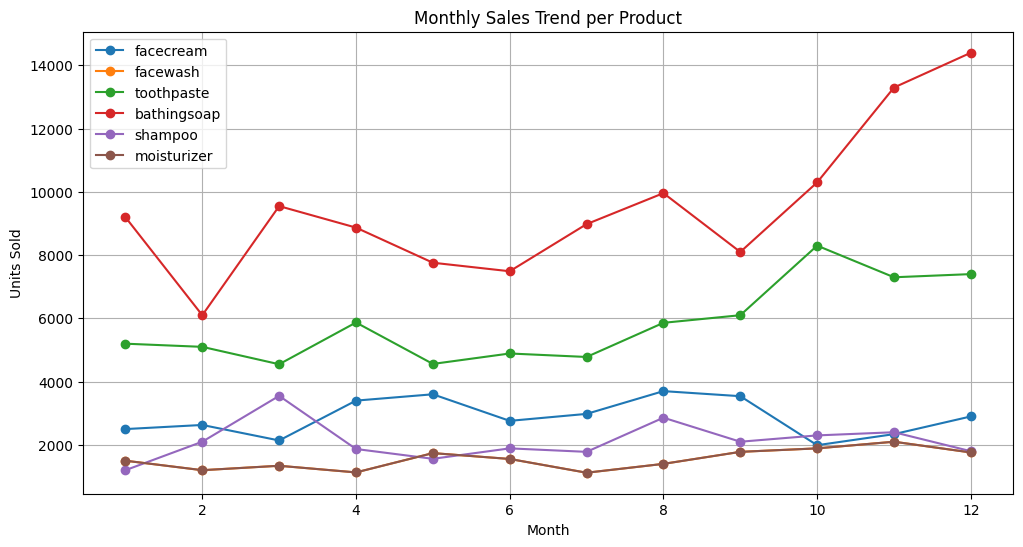

In [8]:
# Plot sales trend for each product
plt.figure(figsize=(12,6))
for col in ["facecream", "facewash", "toothpaste", "bathingsoap", "shampoo", "moisturizer"]:
    plt.plot(df["month_number"], df[col], marker="o", label=col)

plt.title("Monthly Sales Trend per Product")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.show()


##Total sales vs profit

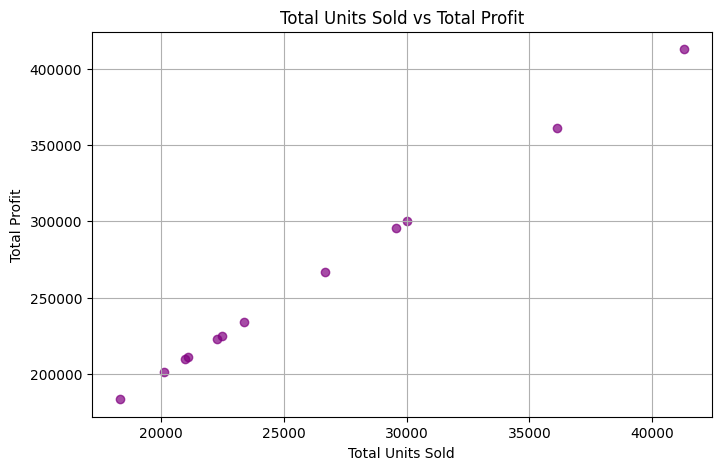

In [9]:
# Scatter plot total units vs total profit
plt.figure(figsize=(8,5))
plt.scatter(df["total_units"], df["total_profit"], color="purple", alpha=0.7)
plt.title("Total Units Sold vs Total Profit")
plt.xlabel("Total Units Sold")
plt.ylabel("Total Profit")
plt.grid(True)
plt.show()


##Product contribution to total sales

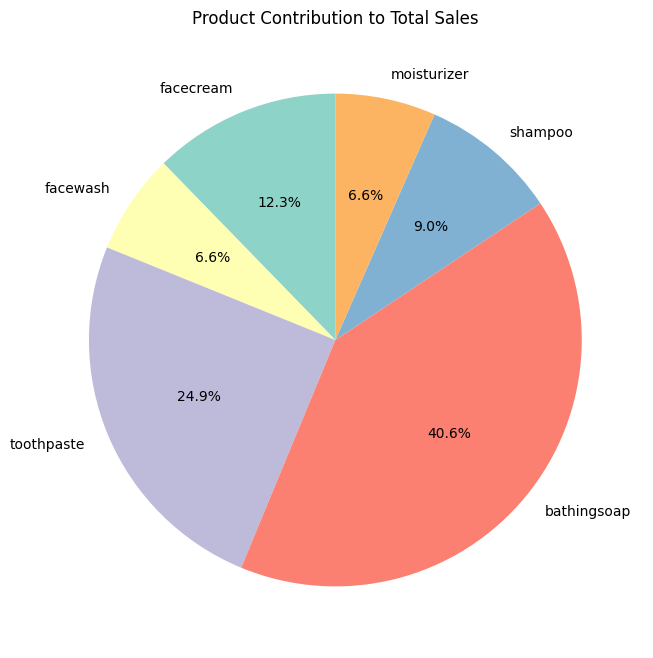

In [10]:
# Pie chart for total sales contribution
product_sales = df[["facecream", "facewash", "toothpaste", "bathingsoap", "shampoo", "moisturizer"]].sum()

plt.figure(figsize=(8,8))
plt.pie(product_sales, labels=product_sales.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.Set3.colors)
plt.title("Product Contribution to Total Sales")
plt.show()


##Insights & Recommendations

1. Product Performance

Toothpaste has the highest sales across the year, showing consistent demand.

Bathing soap is also performing strongly, especially in the last months.

Facewash and Moisturizer are the weakest categories in terms of sales.

✅ Recommendation: Focus marketing and upselling strategies on toothpaste and bathing soap, while considering promotions or bundle offers to push weaker products.



2. Monthly Trends

Sales show a general upward trend, peaking in the last quarter (Oct–Dec).

Profits align with total sales, suggesting stable margins.

✅ Recommendation: Increase stock and prepare campaigns before Q4 to capture seasonal growth.



3. Category Correlations

Total units sold are strongly correlated with toothpaste and bathing soap.

Other products (shampoo, moisturizer) contribute less to overall profit.

✅ Recommendation: Prioritize production and supply chain efficiency for the high-correlation products.



4. Overall Profitability

Profits are growing steadily with sales, no major anomalies observed.

✅ Recommendation: Expand distribution in high-demand areas, and replicate strategies that drove Q4 performance.